# P2: 泰坦尼克号数据集探索

## 1. 数据集内容

包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。以下对数据集内容的说明参考了[Kaggle网站](https://www.kaggle.com/c/titanic/data)

+ Survived: 生存否  0=No, 1=Yes
+ Pclass: 乘客舱位等级(头等舱、二等舱、三等舱) 1=1st, 2=2nd, 3=3rd
+ Name: 姓名
+ Sex: 性别
+ Age: 年龄
+ SibSp: 船上的 兄弟姐妹／配偶 人数
+ Parch: 船上的 父母／子女 人数
+ Ticket: 船票编号
+ Fare: 票价
+ Cabin: 客舱编号
+ Embarked: 登船地点 C=Cherbourg Q=Queenstown S=Southampton

In [2]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv("titanic_data.csv",index_col = 'PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 问题：有哪些因素会让船上的人生还率更高？

因变量：生还率 = 某组样本生还人数／样本总人数

自变量：可能影响生还率的因素，有

+ 年龄
+ 性别
+ 阶级（舱位等级）
+ 亲情（船上的亲人数量）
+ 财力 (票价)
+ 船上位置（客舱）
+ 群体（登船地点）

## 3. 熟悉数据

+ 离散变量计算数值
+ 多个／连续变量绘图

In [3]:
# 定义某组（性别、舱位等级、登船地点等）的生还率

def  survived_rate(df, group_name):
    return df.groupby([group_name])[['Survived']].mean()

In [4]:
# 绘制某组（年龄、客舱等）的生还率

%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns


def survived_rate_plot(df,group_name):
    return survived_rate(df,group_name).plot(marker='.')

Populating the interactive namespace from numpy and matplotlib


观察后得到数据的特点，例如：性别、年龄、舱位等级相关的生还率如下

In [5]:
survived_rate(titanic_df,'Sex')

,Survived
Sex,
female,0.742038
male,0.188908


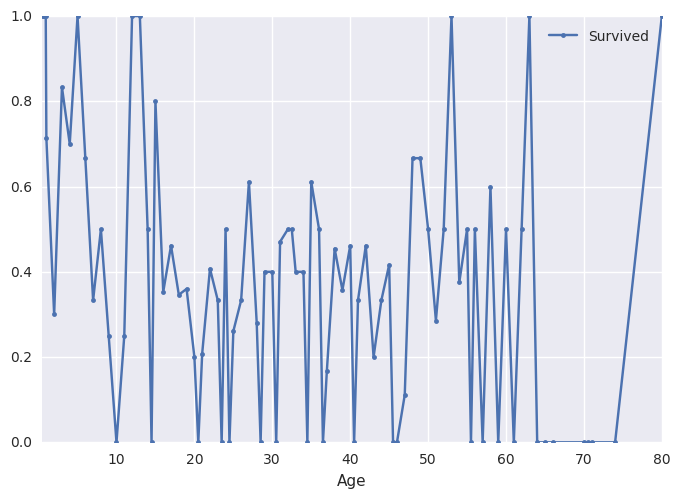

In [6]:
survived_rate_plot(titanic_df,'Age')

In [7]:
survived_rate(titanic_df,'Pclass')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 4. 整理数据

In [8]:
# 清理某列的NaN
def clean_NaN(data_col):
    return titanic_df[data_col].dropna()

# 获取整体的10%数量
def get_bins(data_col):
    series = clean_NaN(data_col)
    return (series.max() - series.min())/10

def float_to_integer(float_num):
    return int(float_num)

# 在DataFrame中增加字段
def add_column(bins_col,data_col):
    titanic_df[bins_col] = (clean_NaN(data_col)/get_bins(data_col)).apply(float_to_integer)
    
# 在DataFrame中增加Money字段，将票价按照总体的10%分段
add_column('Money','Fare')

# 在DataFrame中增加Periods字段,将年龄按照总体的10%分段
add_column('Periods','Age')

titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Money,Periods
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,4.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,4.0


## 5. 分析数据

### 5.1 性别和生还率的关系

In [9]:
# 清理并连接两个Series, 返回相关DataFrame
def clean_and_concat_series(*args):
    return pd.concat([clean_NaN(args[0]),clean_NaN(args[1])], axis=1)    

In [10]:
# 标准化生还率
def standardize_survived_rate(df,*args):
    survived_df = survived_rate(df,args[0])
    survived_rate_1 = (survived_df.loc[args[1]] - df.mean())/df.std()
    survived_rate_2 = (survived_df.loc[args[2]] - df.mean())/df.std()
    return pd.DataFrame([survived_rate_1,survived_rate_2],index=[args[1],args[2]])

In [11]:
sex_and_survived_df = clean_and_concat_series('Sex','Survived').dropna()

In [12]:
sex_and_survived_df.head()

,Sex,Survived
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [13]:
survived_rate(sex_and_survived_df,'Sex')

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
standardize_survived_rate(sex_and_survived_df,'Sex','female','male')

,Survived
female,0.736139
male,-0.400603


In [15]:
print "平均生还率: {}".format(sex_and_survived_df.mean())

平均生还率: Survived    0.383838
dtype: float64


女性生还率高出均值0.74个标准偏差，男性生还率低于均值0.4个标准偏差。女性的生还率高于男性1.14个标准偏差。

### 5.2 年龄和生还率的关系

In [16]:
periods_and_survived_df = clean_and_concat_series('Periods','Survived').dropna()

In [36]:
periods_and_survived_df.head()

,Periods,Survived
PassengerId,,
1,2.0,0
2,4.0,1
3,3.0,1
4,4.0,1
5,4.0,0


In [37]:
all_in_period = periods_and_survived_df.groupby('Periods').count()

In [38]:
survived_in_period = periods_and_survived_df.groupby('Periods')[['Survived']].sum()

In [39]:
periods_and_survived = pd.concat([survived_in_period, all_in_period], axis=1, ignore_index=True)

In [40]:
periods_and_survived['SurvivedRate'] = periods_and_survived[0]/periods_and_survived[1]

In [41]:
periods_and_survived

,0,1,SurvivedRate
Periods,,,
0.0,34,50,0.680000
1.0,15,33,0.454545
2.0,54,164,0.329268
3.0,71,181,0.392265
4.0,55,123,0.447154
5.0,24,74,0.324324
6.0,25,50,0.500000
7.0,11,26,0.423077
8.0,0,11,0.000000


In [48]:
periods_and_survived_rate = periods_and_survived[['SurvivedRate']] 

In [49]:
periods_and_survived_rate

,SurvivedRate
Periods,
0.0,0.680000
1.0,0.454545
2.0,0.329268
3.0,0.392265
4.0,0.447154
5.0,0.324324
6.0,0.500000
7.0,0.423077
8.0,0.000000


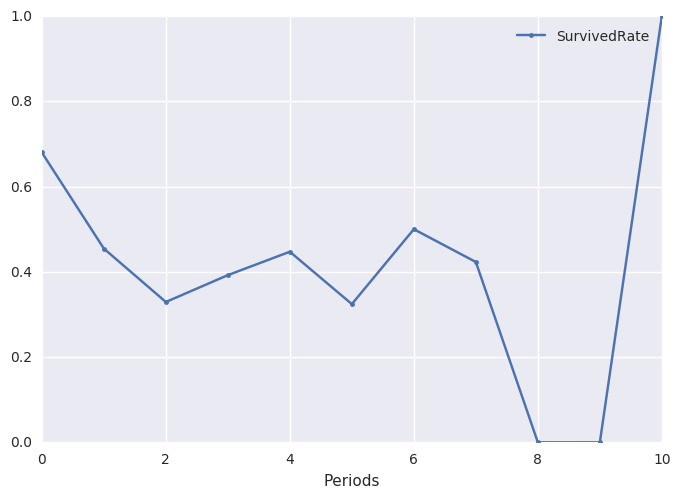

In [45]:
periods_and_survived_rate.plot(marker='.')